In [4]:
from midi_utils import *

In [ ]:
# Example
path = "jazzomat/ArtPepper_Anthropology_FINAL.mid"
midi_file = open_midi_file(path)
assert len(midi_file.tracks) > 0

# From a midi file to note values.
notes, msgs = extract_notes(midi_file)
assert len(notes) > 0

# From note values to a midi file.
midi_file_recov = new_midi_file(notes)
play(midi_file_recov)

In [7]:
dataset, raw_dataset  = notes_dataset("./jazzomat")

In [16]:
# Explore data.
import mido
import numpy as np

times = np.array([])
timesMap = {}

for track in raw_dataset:
    t = [] 
    for msg in track:
        if isinstance(msg, mido.Message):
            timesMap[msg.time] = timesMap.get(msg.time, 0) + 1
            t.append(msg.time)
    times = np.concatenate((times, t))

assert len(times) > 0
assert len(timesMap) > 0

print(f"Times\nMean: {times.mean()}\nMin/Max: {times.min()}/{times.max()}")

Times
Mean: 441.2246979792246
Min/Max: 0.0/5237180.0


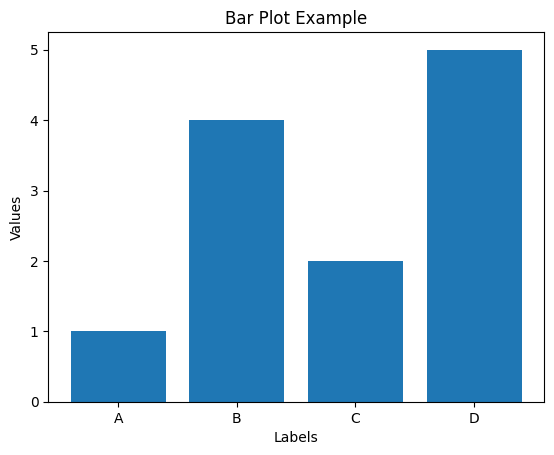

In [1]:
import matplotlib.pyplot as plt

labels = timesMap.keys()
values = timesMap.values()

plt.bar(labels, values)

plt.xlabel('Labels')
plt.ylabel('Values')
plt.title('Bar Plot Example')

# Show plot
plt.show()

In [10]:
# Example
import markovify

model = markovify.Chain(dataset, state_size=3)
# model = model.compile()

song = model.walk()

midi_file = new_midi_file(song)
play(midi_file)

KeyboardInterrupt: 